In [5]:
# importing the general liabraries:

import numpy as np
import pandas as pd

#importing the visualizations related libraries:

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# importing machine learning libraries:

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# filtering out the warnings:

import warnings
warnings.filterwarnings('ignore')

# updating the display settings and the number format:

pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x:'%.4f'% x)

# setting the plot style:

plt.style.use("ggplot")

In [6]:
# Reading the Leads.csv as leads and inspecting the top 5 rows of the dataset:

leads = pd.read_csv("/Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [7]:
# checking the dimensions of the dataframe

leads.shape

(9240, 37)

In [8]:
# looking at the statistical aspects of the dataframe:

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


In [9]:
# Checking the data types and missing values:

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

####Data Cleaning
*   'Select' seems to be the default value stored in the backend for columns that are optional in nature and the prospective lead has chosen not to select any of options available in the dropdown menu.
*  Converting these default values to null values.







In [10]:
# converting these default 'Select' values to null values. : 

leads = leads.replace('Select', np.nan)

# inspecting the top rows to confirm:

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


#Missing Value Treatment:
###Handing missing values in categorical variables:

In [11]:
# creating a function to get null values for each column: 

def null_values(df):
    null_val = df.isnull().mean().reset_index()
    null_val[0]= null_val[0]*100
    null_val = null_val.rename(columns={"index":"Column Name",0:"Missing_Value_%"})
    null_val = null_val.sort_values(by="Missing_Value_%",ascending=False)
    return null_val
# getting null values for leads dataset:

null_val = null_values(leads)
null_val

,Column Name,Missing_Value_%
13,How did you hear about X Education,78.4632
28,Lead Profile,74.1883
25,Lead Quality,51.5909
33,Asymmetrique Profile Score,45.6494
32,Asymmetrique Activity Score,45.6494
30,Asymmetrique Activity Index,45.6494
31,Asymmetrique Profile Index,45.6494
29,City,39.7078
12,Specialization,36.5801
24,Tags,36.2879


💡Key Observations:
There are 17 columns that have null values of which 7 columns have > 45% null values.

We can drop the columns with missing values greater than 45% as imputing these could skew the data.

##Dropping features with > 45% missing values:

In [12]:
# creating a list of columns that have > 45% missing values:

drop = null_val[null_val["Missing_Value_%"] >= 45].reset_index()
drop_cols= drop["Column Name"]

drop_cols

0    How did you hear about X Education
1                          Lead Profile
2                          Lead Quality
3            Asymmetrique Profile Score
4           Asymmetrique Activity Score
5           Asymmetrique Activity Index
6            Asymmetrique Profile Index
Name: Column Name, dtype: object

In [13]:
# dropping the columns with > 45% missing values from the leads df:

leads.drop(drop_cols, axis=1, inplace = True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [14]:
# getting remaining columns with missing values:

null_val_remain = null_val[null_val["Missing_Value_%"] < 45]
null_val_remain

,Column Name,Missing_Value_%
29,City,39.7078
12,Specialization,36.5801
24,Tags,36.2879
15,What matters most to you in choosing a course,29.3182
14,What is your current occupation,29.1126
11,Country,26.6342
9,Page Views Per Visit,1.4827
7,TotalVisits,1.4827
10,Last Activity,1.1147
3,Lead Source,0.3896


💡Key Observations:
There are ~ 6 columns that have null values > 25% and these need to be analyzed individually.

###Manually inspecting the features with > 25% missing values:

In [15]:
# creating a function to pull countplot for columns with missing values:

def countplot(col, asp):
    plot = sns.catplot(x= col, kind="count", data=leads, aspect= asp, palette= "tab10")
    plt.title(f"CountPlot: {col}", fontsize=14, fontweight=600)
    plt.xlabel(col, fontsize = 12)
    plt.ylabel("Count", fontsize = 12)
    plt.xticks(rotation=90)
        
    ax = plot.facet_axis(0,0)
    for p in ax.patches:        
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),fontsize=12,color='blue',ha='center', va='bottom')

plt.show()

##City:
##Description: The city of the customer.

In [16]:
# pulling value counts for the feature: 

leads['City'].value_counts(normalize=True)*100

Mumbai                        57.8352
Thane & Outskirts             13.4985
Other Cities                  12.3138
Other Cities of Maharashtra    8.2032
Other Metro Cities             6.8210
Tier II Cities                 1.3283
Name: City, dtype: float64

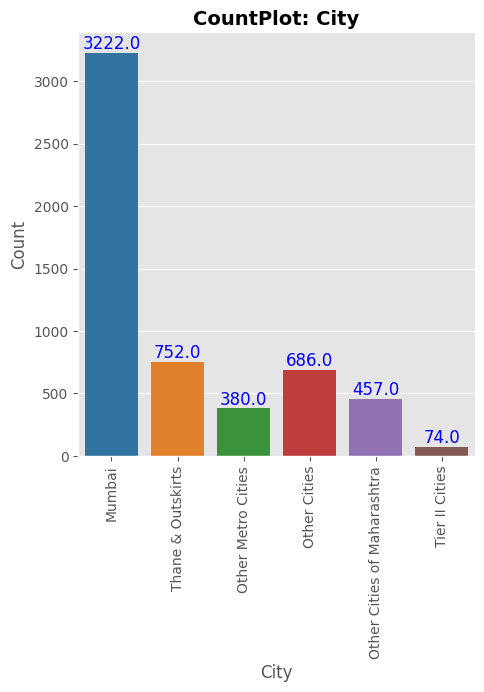

In [17]:
countplot("City", 1)

💡Key Observations:

~40% of the datapoints in the column are null.
Imputing with mode will skew the data even further.
Given online nature of business, city information is unlikely to be key variable, hence dropping.

In [18]:
# dropping the column City:

leads.drop("City",axis=1, inplace = True)

Specialization:

Description: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

In [19]:
# pulling value counts for the feature: 

leads['Specialization'].value_counts(normalize=True)*100

Finance Management                  16.6553
Human Resource Management           14.4710
Marketing Management                14.3003
Operations Management                8.5836
Business Administration              6.8771
IT Projects Management               6.2457
Supply Chain Management              5.9556
Banking, Investment And Insurance    5.7679
Travel and Tourism                   3.4642
Media and Advertising                3.4642
International Business               3.0375
Healthcare Management                2.7133
Hospitality Management               1.9454
E-COMMERCE                           1.9113
Retail Management                    1.7065
Rural and Agribusiness               1.2457
E-Business                           0.9727
Services Excellence                  0.6826
Name: Specialization, dtype: float64

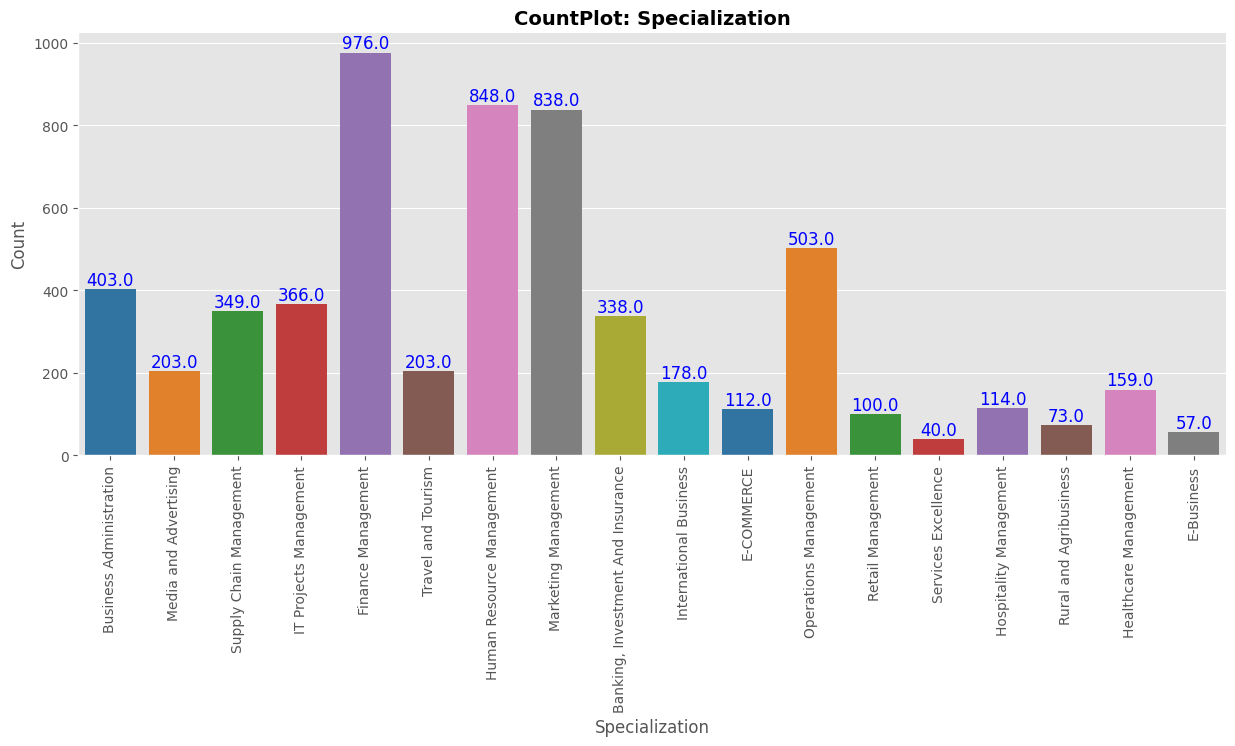

In [20]:
countplot('Specialization',2.5)

💡Key Observations:
~37% of the datapoints in the column are null.
The feature seems important from a business prespective, since the sales team could use this info to pitch relevant industry courses to the lead.

Given the high % of missing values, imputing with mode is not an option as it will skew the data.
Creating and new category 'Unknown' seems like the most feasible approach.

In [21]:
# replacing the null values with a new category "Unknown":

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Unkown')

Tags:

Description: Tags assigned to customers indicating the current status of the lead.

In [22]:
# pulling value counts for the feature: 

leads['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                 35.1962
Ringing                                             20.4349
Interested in other courses                          8.7141
Already a student                                    7.8988
Closed by Horizzon                                   6.0812
switched off                                         4.0768
Busy                                                 3.1595
Lost to EINS                                         2.9727
Not doing further education                          2.4631
Interested  in full time MBA                         1.9874
Graduation in progress                               1.8855
invalid number                                       1.4099
Diploma holder (Not Eligible)                        1.0702
wrong number given                                   0.7984
opp hangup                                           0.5606
number not provided                                  0.4586
in touch with EINS                      

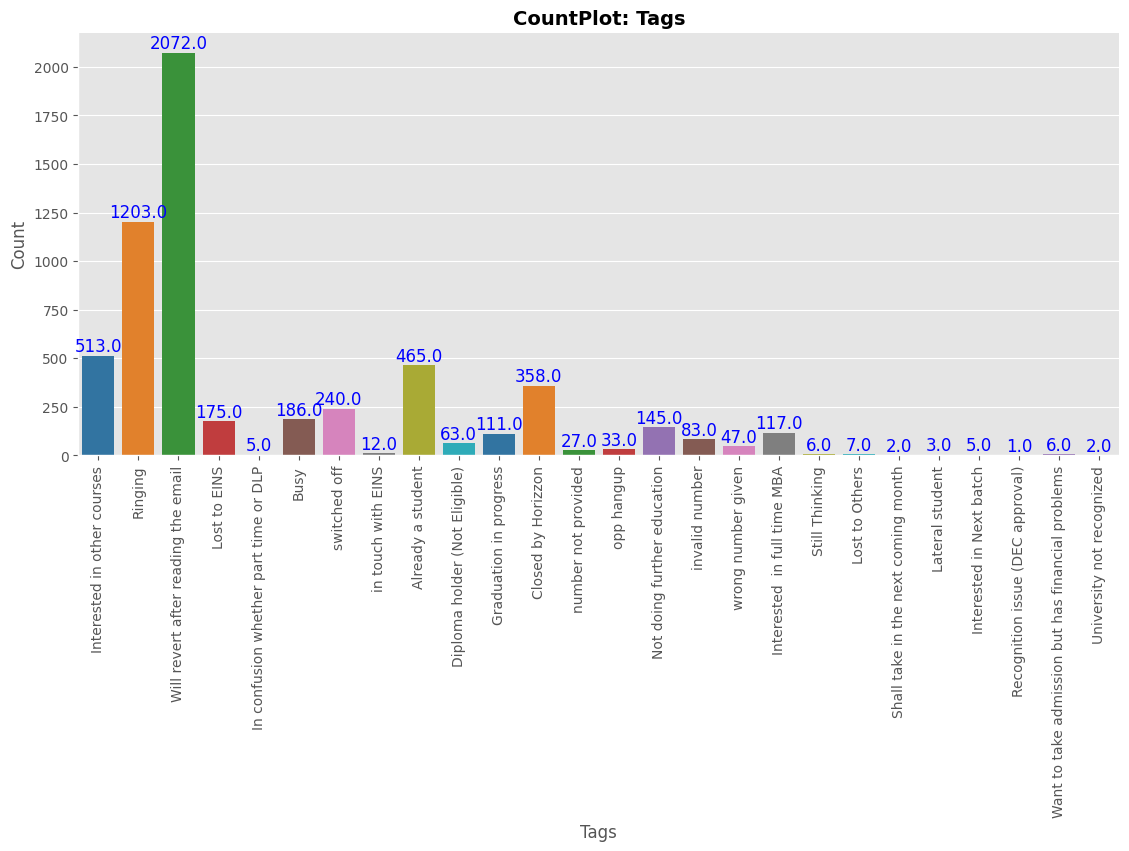

In [23]:
countplot('Tags', 2.5)

💡Key Observations:

~36% of the datapoints in the column are null. Imputing with mode will skew the data.

From the categories it seems like the field is populated only once the sales team has contacted the potential lead and hence this field is unlikely to be available at the time of classifying as hot lead or not.

Dropping the column as it cannot be used for modeling.

In [24]:
# dropping the column Tags:

leads.drop("Tags",axis=1, inplace = True)

What matters most to you in choosing a course:

Description: An option selected by the customer indicating what is their main motto behind doing this course.

In [25]:
# pulling value counts for the feature: 

leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects     99.9541
Flexibility & Convenience    0.0306
Other                        0.0153
Name: What matters most to you in choosing a course, dtype: float64

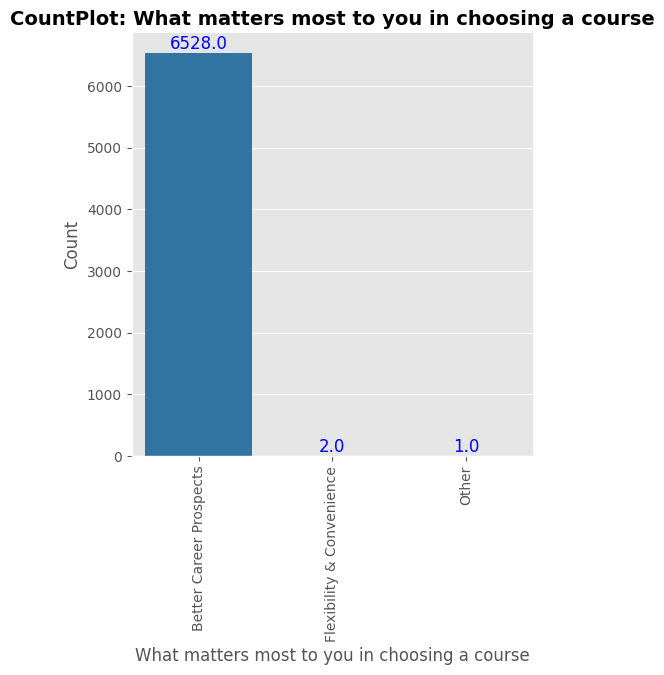

In [26]:
countplot('What matters most to you in choosing a course',1)

💡Key Observations:

~29% of the datapoints in the column are null.

The data is already skewed with ~99.95 points belonging to the category 'Better Career Prospects'.

Dropping the column given the skew.

In [27]:
# dropping the column 'What matters most to you in choosing a course':

leads.drop('What matters most to you in choosing a course',axis=1, inplace = True)

What is your current occupation:

Description: Indicates whether the customer is a student, umemployed or employed.

In [28]:
# pulling value counts for the feature: 

leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed             85.4962
Working Professional   10.7786
Student                 3.2061
Other                   0.2443
Housewife               0.1527
Businessman             0.1221
Name: What is your current occupation, dtype: float64

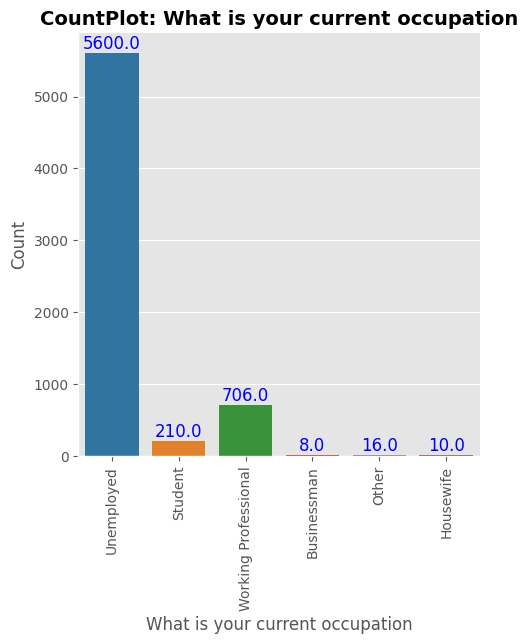

In [29]:
countplot('What is your current occupation',1)

💡Key Observations:

~29% of the datapoints in the column are null.

The data is already skewed with ~85.5% of the data points belonging to the category 'Unemployed'.

Given the variable could important not dropping it instead replacing the Null values with 'Unknown'.

In [30]:
# replacing the null values with a new category "Unknown":

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unkown')

Country:

Description: The country of the customer.

In [31]:
# pulling value counts for the feature: 

leads['Country'].value_counts(normalize=True)*100

India                  95.7663
United States           1.0178
United Arab Emirates    0.7818
Singapore               0.3540
Saudi Arabia            0.3098
United Kingdom          0.2213
Australia               0.1918
Qatar                   0.1475
Hong Kong               0.1033
Bahrain                 0.1033
Oman                    0.0885
France                  0.0885
unknown                 0.0738
South Africa            0.0590
Nigeria                 0.0590
Germany                 0.0590
Kuwait                  0.0590
Canada                  0.0590
Sweden                  0.0443
China                   0.0295
Asia/Pacific Region     0.0295
Uganda                  0.0295
Bangladesh              0.0295
Italy                   0.0295
Belgium                 0.0295
Netherlands             0.0295
Ghana                   0.0295
Philippines             0.0295
Russia                  0.0148
Switzerland             0.0148
Vietnam                 0.0148
Denmark                 0.0148
Tanzania

💡Key Observations:

~27% of the datapoints in the column are null.

The data is already skewed with ~95.77% of the data points belonging to the category 'India'.

Given the online nature of business, country info is unlikely to play a vital role dropping the column

In [32]:
# dropping the column 'Country':

leads.drop('Country',axis=1, inplace = True)

Last Activity:

Description: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

In [33]:
# pulling value counts for the feature: 

leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                   37.6163
SMS Sent                       30.0427
Olark Chat Conversation        10.6490
Page Visited on Website         7.0045
Converted to Lead               4.6843
Email Bounced                   3.5679
Email Link Clicked              2.9222
Form Submitted on Website       1.2696
Unreachable                     1.0178
Unsubscribed                    0.6676
Had a Phone Conversation        0.3283
Approached upfront              0.0985
View in browser link Clicked    0.0657
Email Received                  0.0219
Email Marked Spam               0.0219
Visited Booth in Tradeshow      0.0109
Resubscribed to emails          0.0109
Name: Last Activity, dtype: float64

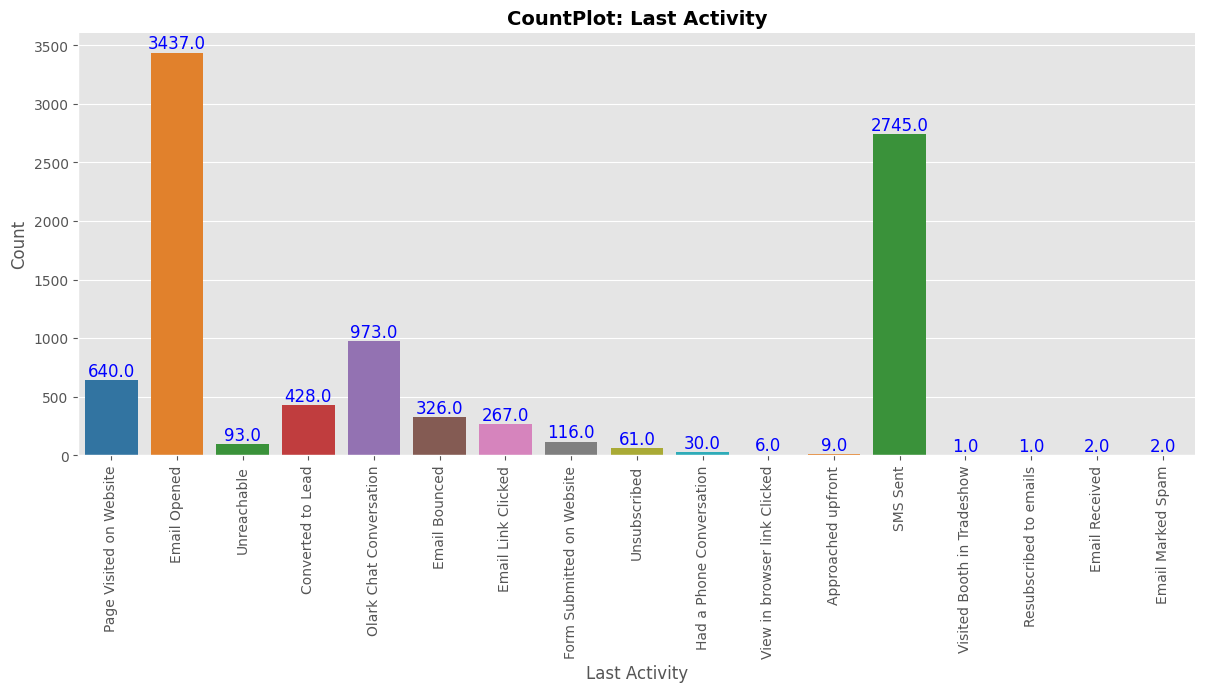

In [34]:
countplot('Last Activity',2.5)

💡Key Observations:

Using the mode 'Email Opened' to replace null values in this column seems like a good approach.


In [35]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Email Opened')

In [36]:
# clubbing all categories with low count to 'Others' category:
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

Lead Source:

Description: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

In [37]:
# pulling value counts for the feature: 

leads['Lead Source'].value_counts(normalize=True)*100

Google              31.1604
Direct Traffic      27.6293
Olark Chat          19.0678
Organic Search      12.5380
Reference            5.8018
Welingak Website     1.5428
Referral Sites       1.3581
Facebook             0.5976
bing                 0.0652
google               0.0543
Click2call           0.0435
Press_Release        0.0217
Social Media         0.0217
Live Chat            0.0217
youtubechannel       0.0109
testone              0.0109
Pay per Click Ads    0.0109
welearnblog_Home     0.0109
WeLearn              0.0109
blog                 0.0109
NC_EDM               0.0109
Name: Lead Source, dtype: float64

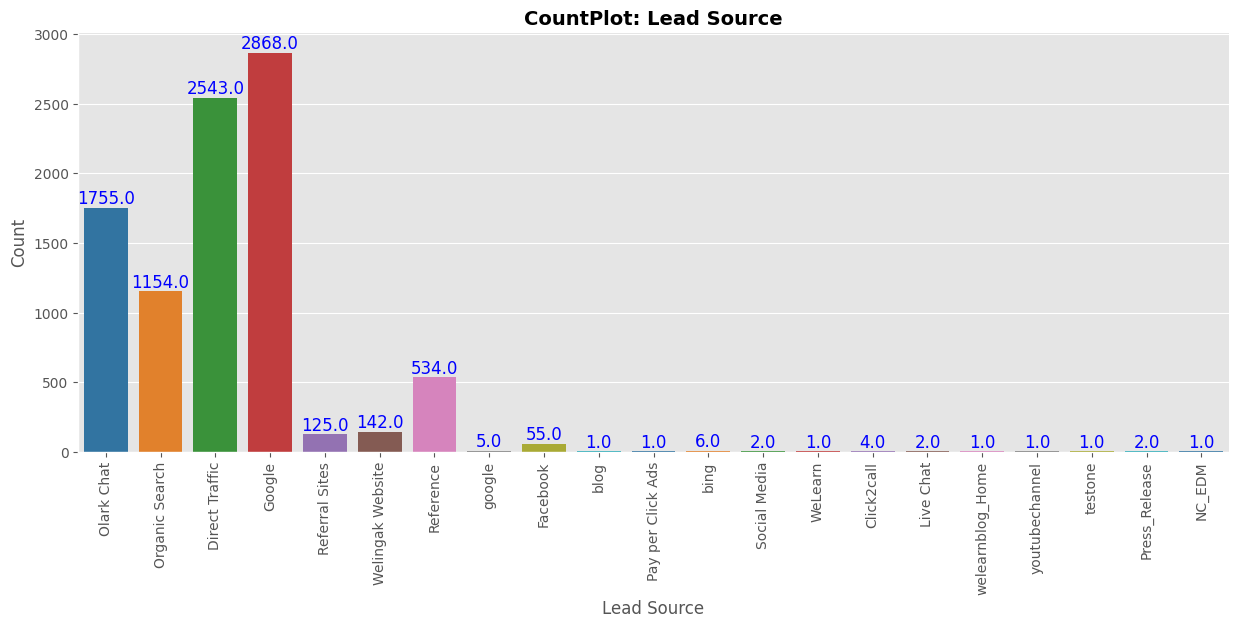

In [38]:
countplot('Lead Source',2.5)

💡Key Observations:

Need to replace the category 'google' as it is the same as 'Google'.

Using the the mode Google to replace null values in this column seems like a good approach.

Some of the sources like 'blog', 'Pay per Click Ads' have very limited count so we can club them into one category called 'Others'.

In [39]:
# replacing google with Google:

# leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

# clubbing fields with limted count to others:

leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')
# checking the shape of data post updates to categorical features:

leads.shape

(9240, 26)

##Handling missing values and outliers in numerical variables:

In [40]:
# Creating a function to pull bar and distribution plots for numerical cols:

def numerical_charts(df,col):
    
    fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (10,5))
    
    # Title
    fig.suptitle(col, fontsize= 14, fontweight= 800)

    # plot1:
    sns.boxplot(y=df[col], orient= "h", ax= ax[0], width = 0.5, linewidth= 1.5, color= "gray")
    ax[0].set_title('Boxplot', 
                    fontsize= 14, fontweight= 600, y= 1.02)

    # plot2:
    sns.distplot(df[col], ax= ax[1],kde_kws=dict(linewidth= 2))
    ax[1].set_title('Distribution Plot', 
                    fontsize= 14, fontweight= 600, y= 1.02)

    plt.tight_layout()
    plt.show()
# pulling stats for the dataset at various percentiles:

leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628
std,23405.9957,0.4867,4.8549,548.0215,2.1614
min,579533.0000,0.0000,0.0000,0.0000,0.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000
90%,650506.1000,1.0000,7.0000,1380.0000,5.0000
95%,655404.0500,1.0000,10.0000,1562.0000,6.0000
99%,659592.9800,1.0000,17.0000,1840.6100,9.0000


TotalVisits:

Description: The total number of visits made by the customer on the website.

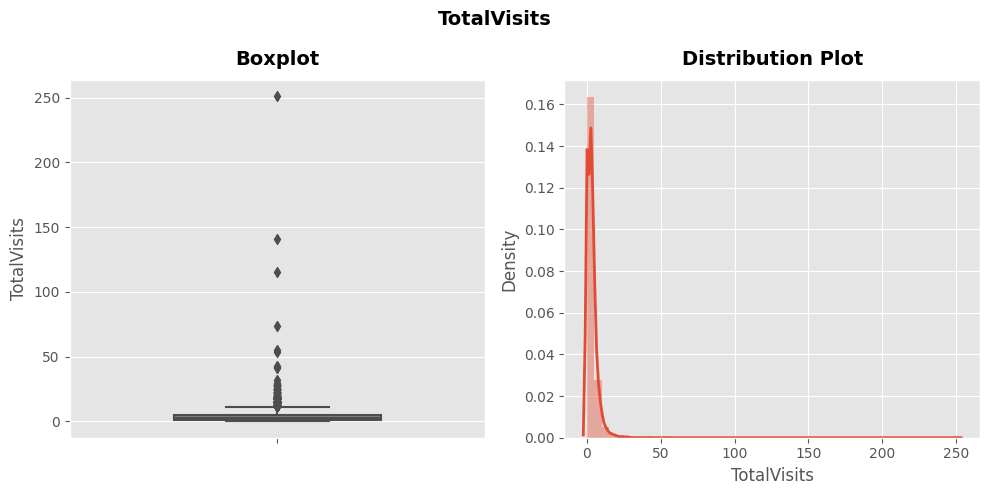

In [41]:
# plotting box and distribution chart for the numerical feature:

numerical_charts(leads,"TotalVisits")

💡Key Observations:

Given the presence of outliers in the column, using median to impute the missing values

Will cap the outliers with the value at 99th percentile.

In [42]:
#imputing the missing values with the median: 

leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)
# capping outliers at 99%:

total_visits_cap = leads['TotalVisits'].quantile(0.99)
leads = leads[leads["TotalVisits"] < total_visits_cap]

Total Time Spent on Website:

Description: The total time spent by the customer on the website.

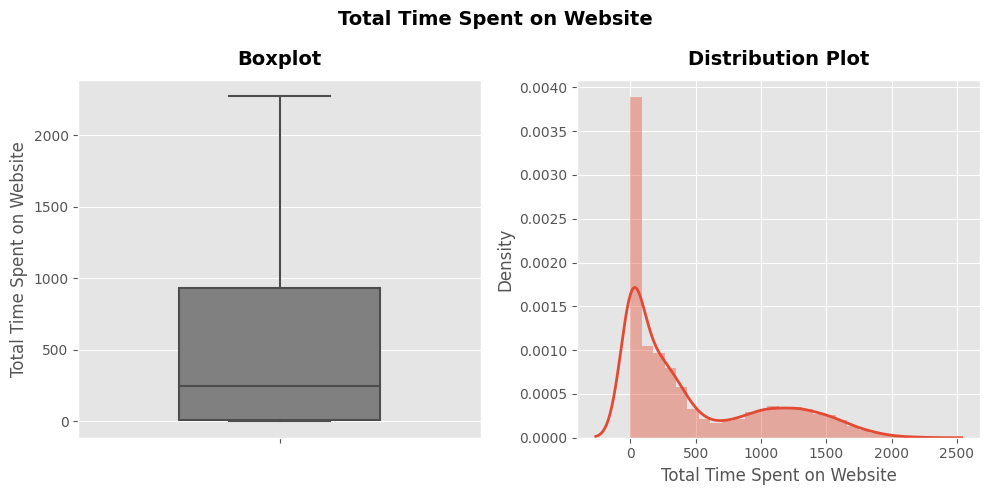

In [43]:
# plotting box and distribution chart for the numerical feature:

numerical_charts(leads,"Total Time Spent on Website")

💡Key Observations:

There are no missing values and no major outliers.

Page Views Per Visit:

Description: Average number of pages on the website viewed during the visits.

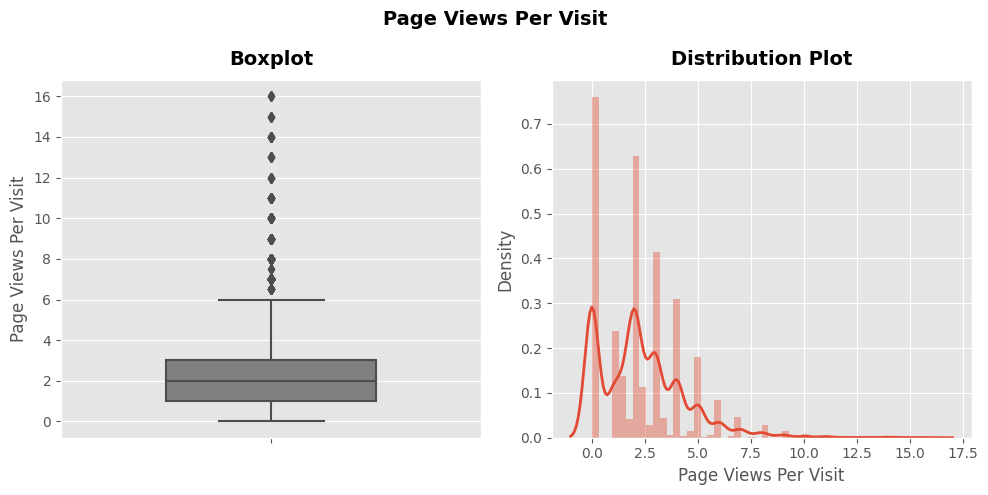

In [44]:
numerical_charts(leads,"Page Views Per Visit")

💡Key Observations:

Given the presence of outliers in the column, capping at 95th percentile.

In [45]:
#imputing the missing values with the median: 

leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)
page_views_cap = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads["Page Views Per Visit"] < page_views_cap]
# checking if all the null values have been fixed:

null_values(leads)

,Column Name,Missing_Value_%
3,Lead Source,0.3987
0,Prospect ID,0.0000
14,Magazine,0.0000
24,A free copy of Mastering The Interview,0.0000
23,I agree to pay the amount through cheque,0.0000
22,Get updates on DM Content,0.0000
21,Update me on Supply Chain Content,0.0000
20,Receive More Updates About Our Courses,0.0000
19,Through Recommendations,0.0000
18,Digital Advertisement,0.0000


💡Key Observations:

There are no more missing values that need to be handled.

In [46]:
# checking unique values in each column to understand uni

nunique= leads.nunique().reset_index()
nunique = nunique.rename(columns={"index":"Column Name",0:"Unique Values"})
nunique = nunique.sort_values(by="Unique Values",ascending=False)
nunique

,Column Name,Unique Values
0,Prospect ID,9029
1,Lead Number,9029
8,Total Time Spent on Website,1717
9,Page Views Per Visit,57
11,Specialization,19
7,TotalVisits,17
25,Last Notable Activity,16
10,Last Activity,11
3,Lead Source,9
12,What is your current occupation,7


💡Key Observations:

The below columns have only 1 unique value and are unlikley to any impact on model and hence can be dropped:

Receive More Updates About Our Courses

Get updates on DM Content

Magazine

I agree to pay the amount through cheque

In [47]:
 # creating a list of columns that have n_unique value= 1

n_unique_1 = ['Receive More Updates About Our Courses',"Update me on Supply Chain Content", "Get updates on DM Content", 
                "Magazine", "I agree to pay the amount through cheque"]
# dropping the columns with n_unique value= 1 from the leads df 

leads.drop(n_unique_1, axis=1, inplace = True)

Inspecting columns with only 2 unique values

Checking for imbalance in the columns with only 2 unique values

In [48]:
# creating a list of columns that have n_unique value= 2 (ex. converted column)

n_unique_2 = ["Do Not Call", "A free copy of Mastering The Interview", "Through Recommendations", 
              "Digital Advertisement","Newspaper", "X Education Forums", "Do Not Email", "Search", "Newspaper Article"]
def yesno_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leads[n_unique_2] = leads[n_unique_2].apply(yesno_map)
leads[n_unique_2].describe()

,Do Not Call,A free copy of Mastering The Interview,Through Recommendations,Digital Advertisement,Newspaper,X Education Forums,Do Not Email,Search,Newspaper Article
count,9029.0000,9029.0000,9029.0000,9029.0000,9029.0000,9029.0000,9029.0000,9029.0000,9029.0000
mean,0.0002,0.3057,0.0007,0.0002,0.0001,0.0000,0.0777,0.0014,0.0000
std,0.0149,0.4607,0.0258,0.0149,0.0105,0.0000,0.2678,0.0379,0.0000
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000


In [49]:
# checking the data imbalance in columns with only 2 unique values

for i in n_unique_2:
    print(leads[i].value_counts(dropna=False))
    print("*"*50 ,end = "\n\n")

0    9027
1       2
Name: Do Not Call, dtype: int64
**************************************************

0    6269
1    2760
Name: A free copy of Mastering The Interview, dtype: int64
**************************************************

0    9023
1       6
Name: Through Recommendations, dtype: int64
**************************************************

0    9027
1       2
Name: Digital Advertisement, dtype: int64
**************************************************

0    9028
1       1
Name: Newspaper, dtype: int64
**************************************************

0    9029
Name: X Education Forums, dtype: int64
**************************************************

0    8327
1     702
Name: Do Not Email, dtype: int64
**************************************************

0    9016
1      13
Name: Search, dtype: int64
**************************************************

0    9029
Name: Newspaper Article, dtype: int64
**************************************************



💡Key Observations:

Barring the feature 'A free copy of Mastering The Interview', all of the columns show imbalance > 85%.

The feature 'A free copy of Mastering The Interview' doesn't seem to be that relevant from a business prespective as it indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

Dropping these imbalanced features would be prudent to avoid overfitting the model.

In [50]:
# dropping the imbalanced features along with 'A free copy of Mastering The Interview':

leads.drop(n_unique_2, axis=1, inplace = True)
#Inspecting the dataframe to confirm the applied changes:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0000,0,0.0000,Page Visited on Website,Unkown,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0000,674,2.5000,Email Opened,Unkown,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0000,1532,2.0000,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0000,305,1.0000,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0000,1428,1.0000,Converted to Lead,Unkown,Unemployed,Modified


In [51]:
leads.shape

(9029, 12)

In [52]:
# inspecting if the dataset has duplicates:

leads[leads.duplicated(keep = False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity


💡Key Observations:

There are no duplicates in the data

##Exploratory Data Analysis:
###Inspecting the target variable for imbalance:

In [53]:
# checking imbalance in the data:

leads["Converted"].value_counts(normalize=True)

0   0.6149
1   0.3851
Name: Converted, dtype: float64

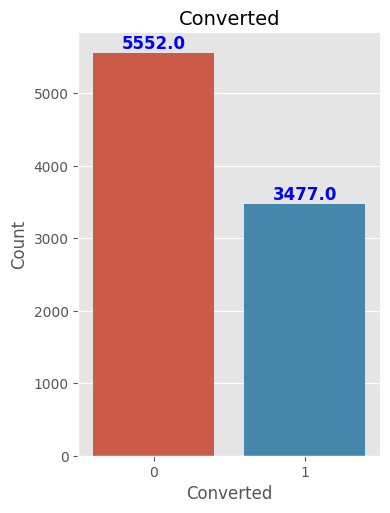

In [54]:
# code to plot a catplot to check imbalance in target variable: 

plot = sns.catplot(x="Converted", kind="count", data=leads, aspect= 0.8);
plt.title("Converted", fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# code to update data labels:

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(),fontsize=12, fontweight = 600,color='blue',ha='center', va='bottom')
    
plt.show()

💡Key Observations:

There is no material immbalance in the target variable, as both converted and non-converted classes have good representation.

Firms current conversion rate is ~38%

##Bivariate analysis for Categorical data:

In [56]:
# function to create catplot plots for categorical variables: 

def catplot(col, asp):
    plot = sns.catplot(x=col, hue="Converted", kind="count", data=leads, aspect= asp);
    plt.title(f" Conversion in terms of {col}", fontsize = 14, fontweight = 700)
    plt.xlabel(col, fontsize = 12)
    plt.ylabel("Count", fontsize = 12)
    plt.xticks(rotation=90)
    
    #
    ax = plot.facet_axis(0,0)
    for p in ax.patches:
        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()
            height = int(height)
            ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    return plt.show()

In [57]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9029 non-null   object 
 1   Lead Number                      9029 non-null   int64  
 2   Lead Origin                      9029 non-null   object 
 3   Lead Source                      8993 non-null   object 
 4   Converted                        9029 non-null   int64  
 5   TotalVisits                      9029 non-null   float64
 6   Total Time Spent on Website      9029 non-null   int64  
 7   Page Views Per Visit             9029 non-null   float64
 8   Last Activity                    9029 non-null   object 
 9   Specialization                   9029 non-null   object 
 10  What is your current occupation  9029 non-null   object 
 11  Last Notable Activity            9029 non-null   object 
dtypes: float64(2), int64

###Lead Origin:

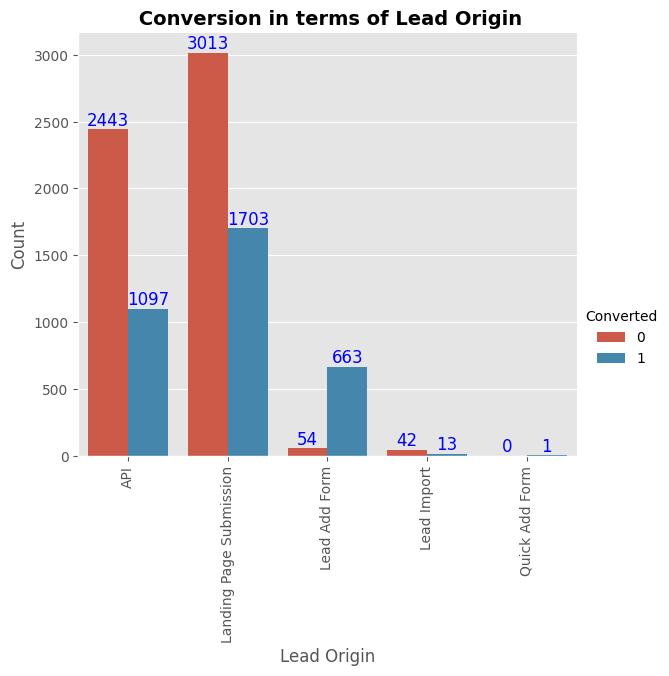

In [58]:
catplot("Lead Origin",1.2)

💡Key Observations:

While the count of leads from 'API' and 'Landing Page Submission' are high, conversion rates seem poor at 31% and 36% respectively.

Although leads from 'Lead Add Form' is low, the conversion rate is very high at ~92%.

Leads from 'Lead Import' and 'Quick Add Form' are miniscule and hence can be ignored

###Lead Source:

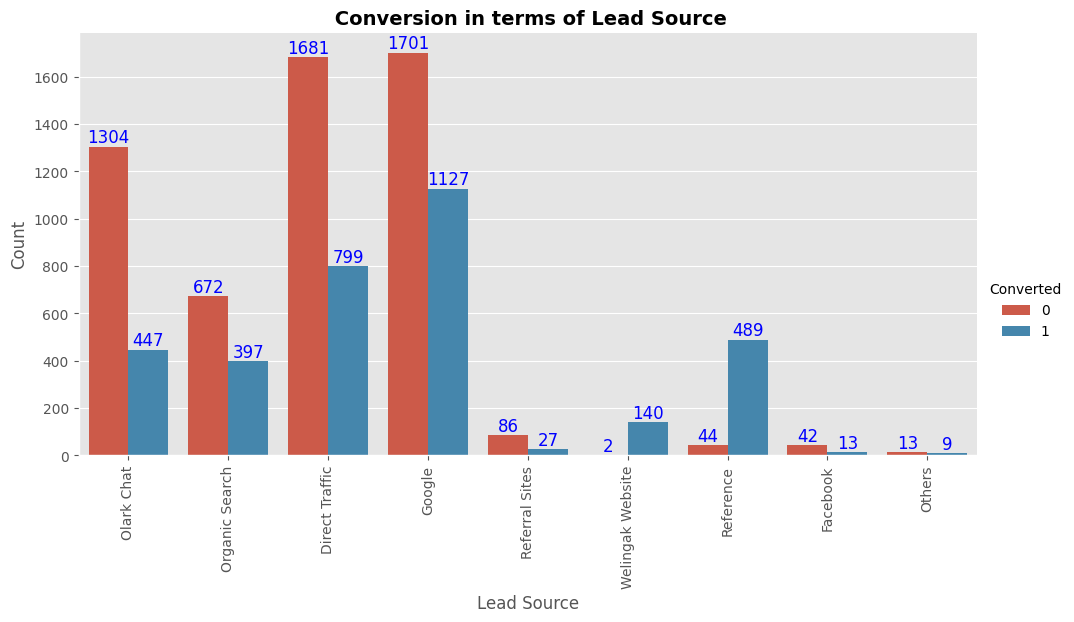

In [59]:
catplot("Lead Source",2)

💡Key Observations:

~90% of the leads are generated from 4 Lead Sources 'Google','Direct Traffic', 'Olark Chat' and 'Organic Search', however only 34% of those leads are being converted.

The conversion rate for leads from 'Welingak Website' and 'Reference' are high at ~99% and ~92% respectively, however only 6% of the total leads are being generated from these Sources.

To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic and google lead source . Also, generate more leads from reference and welingak website since they have a very good conversion rate.

###Last Activity:

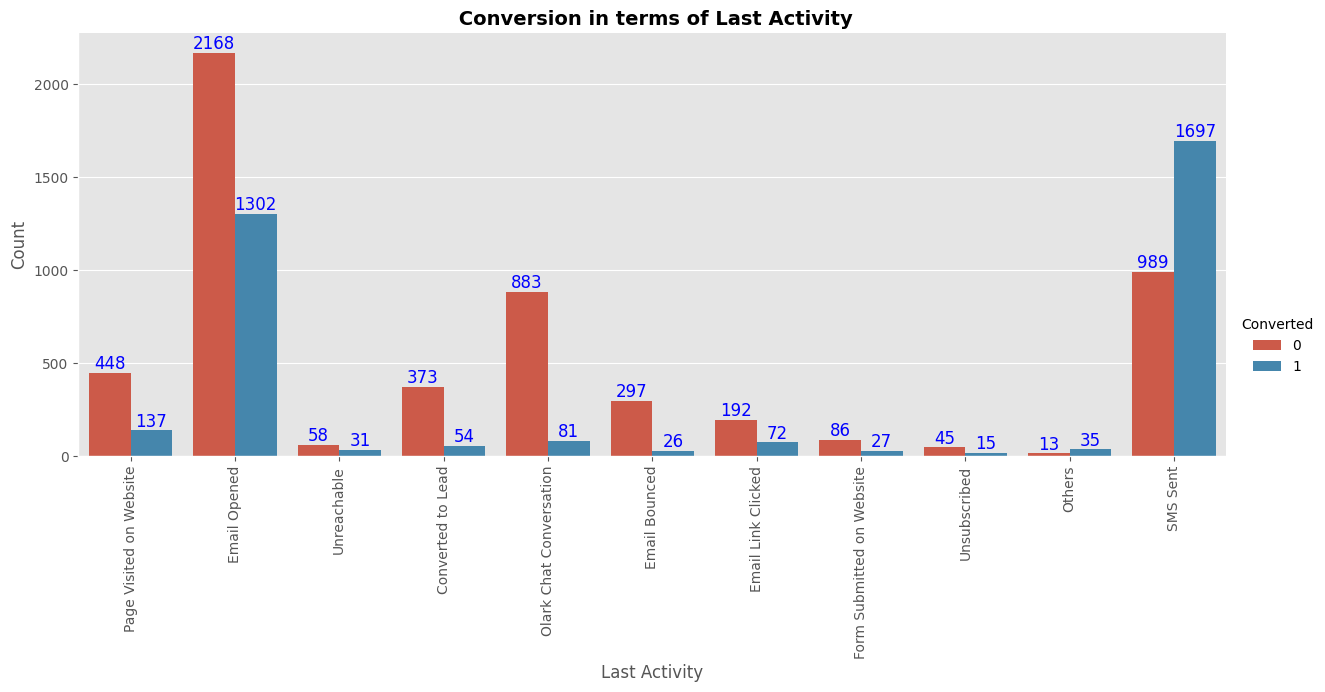

In [60]:
catplot('Last Activity',2.5)

💡Key Observations:

Maximum leads are generated from people with last activity - Email opened and SMS sent.

Conversion rate is highest for SMS Sent (~63%), where as it is only ~38% for Email Opened.

Olark chat conversation and Page Visited on Website generates significant number of leads but their conversion rates are very low at 8% and 38% respectively.

To improve overall lead conversion rate, the firms focus should be coming up with strategies to improve lead conversion of people with last activity -Olark chat conversation, Email Opened and Page Visited on Website.
###Specialization:

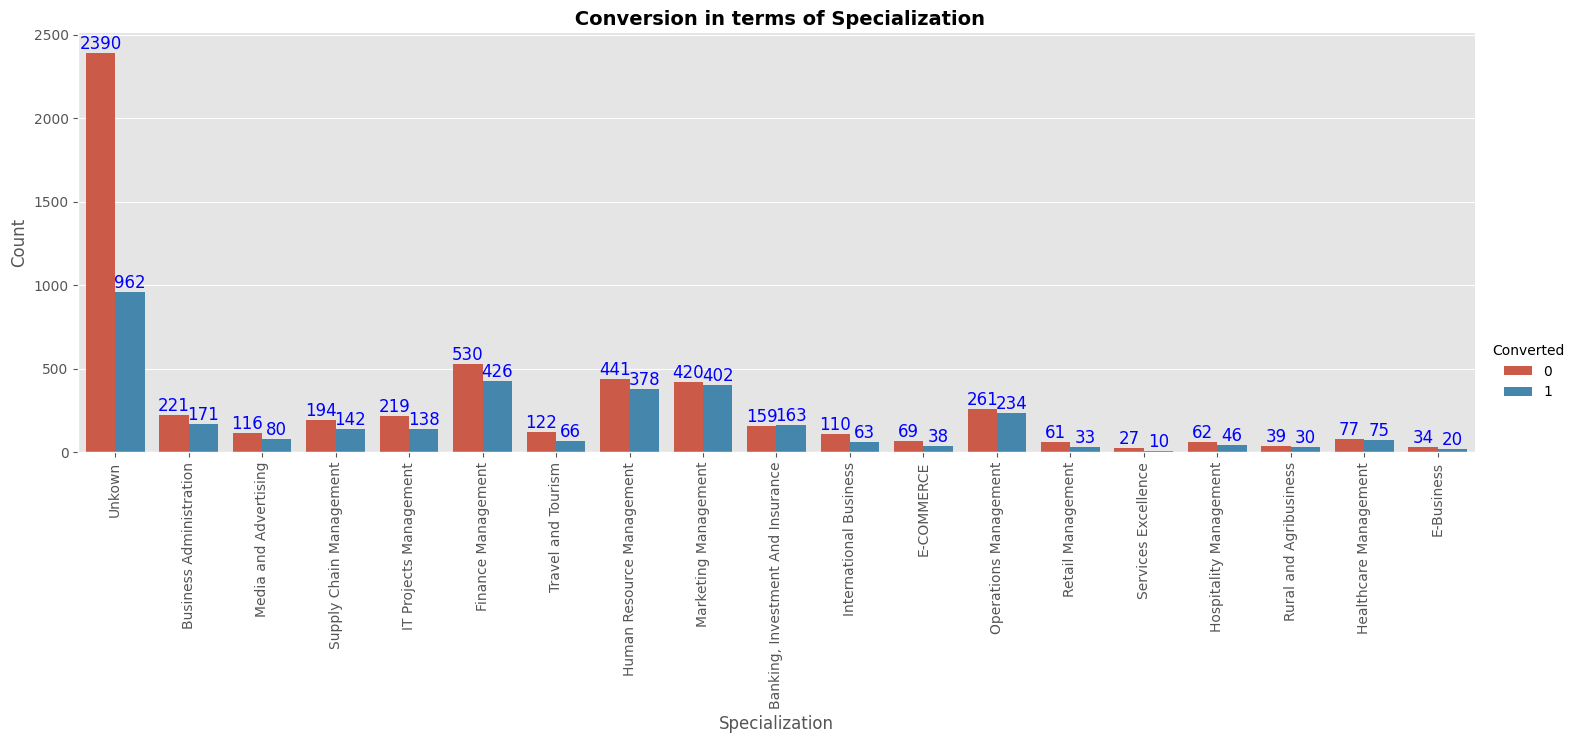

In [61]:
catplot('Specialization', 3.0)

💡Key Observations:

Leaving aside the Unknown values, mangement related specializations (supply chain, IT, Finance, HR, marketing, operations, retail, hospitality and healthcare) have a conversion rate of ~45% vs. others specializations at ~42%.
Among the management related specializations, Healthcare and Marketing Management seem to have the highest conversion rate at ~49% each.

Among the other specializations, Baking Investment and Insurance had the highest conversion rate of ~51%.

The worst performing specialization was Services Excellence with a mere ~27% conversion rate.

###What is your current occupation:

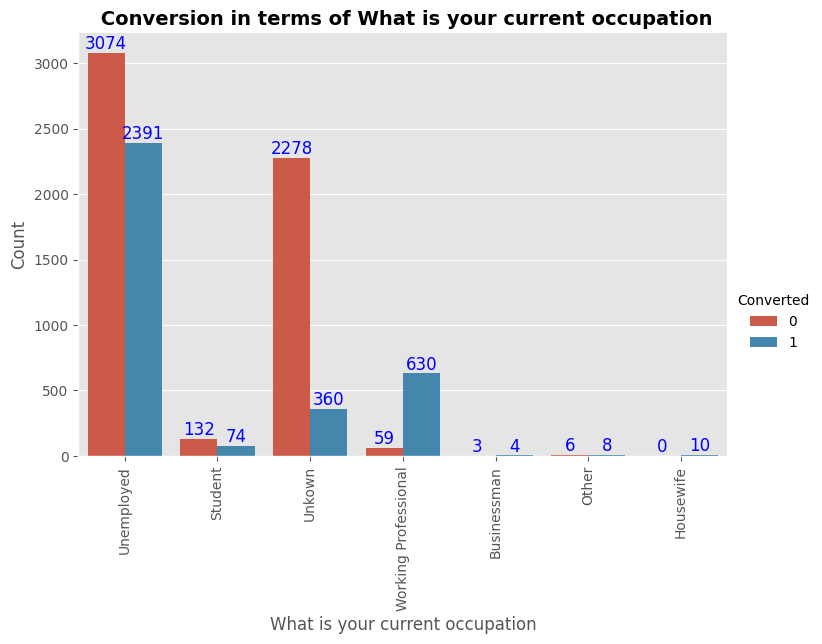

In [62]:
catplot('What is your current occupation', 1.5)

💡Key Observations:

Working Professionals have the highest conversion rate at ~91%.

Unemployed and Student leads have low conversion rates (~44% and 36% respectively) but they generate maximum leads counts.

To improve overall lead conversion rate, focus should be on improving lead conversion rate of unemployed.

Also,generate more leads from Student and Working Professionals since they have a very good conversion rate.


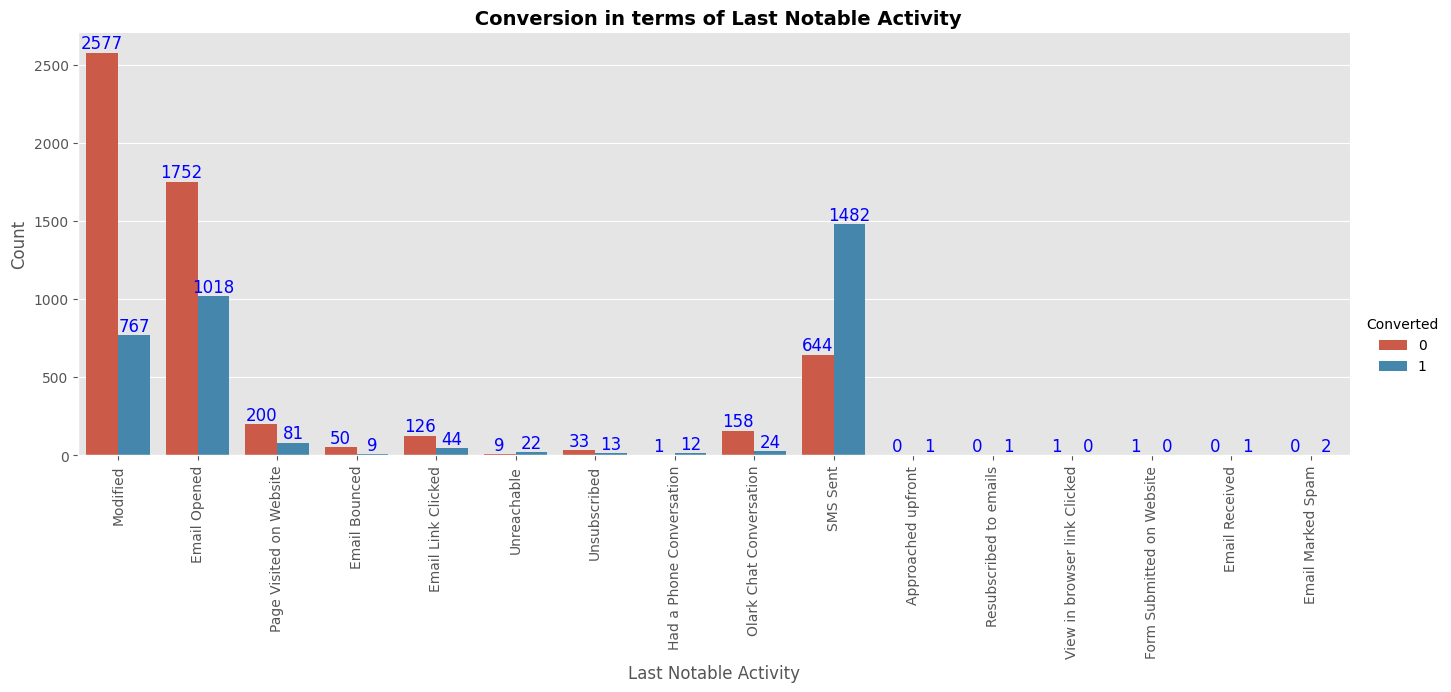

In [63]:
catplot('Last Notable Activity', 2.75)

💡Key Observations:

Dropping this column as the feature seems to be generated by the sales team while nuturing the lead.

In [64]:
# dropping the column 'Last Notable Activity':

leads.drop('Last Notable Activity',axis=1, inplace = True)
leads.shape

(9029, 11)

##Bivariate Analysis for numerical variables:

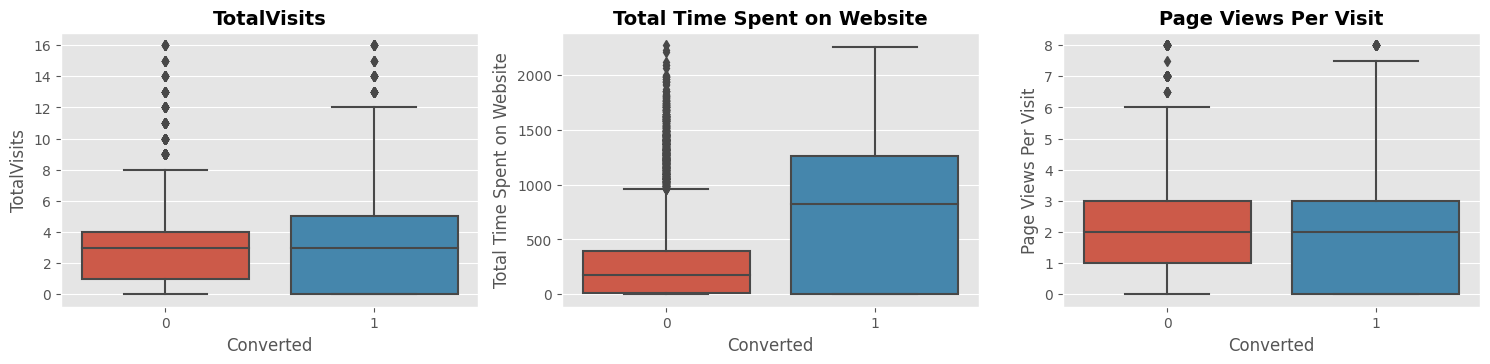

In [65]:
num_col = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
fig=plt.subplots(figsize=(15, 10))

for i, col in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = col, x = 'Converted', data = leads, linewidth = 1.5)
    plt.title(col, fontsize = 14, fontweight = 700)
    plt.tight_layout()

💡Key Observations:


Total Visits:

Median for converted and non-converted leads are same.

People who visits the platform have equal chances(50-50) of applying and not applying for the course.

Total Time Spent on Website:

People spending more time on website have more chances of opting for a course

People who spend less time on the website didn't opt for any courses.

Page Views Per Visit:

Median for converted and non-converted leads are same.

People who visit 1 to 3 average number of pages on website have equal chances(50-50) of applying and not applying for the course.

##Correlation Heatmap for Numerical Variables:

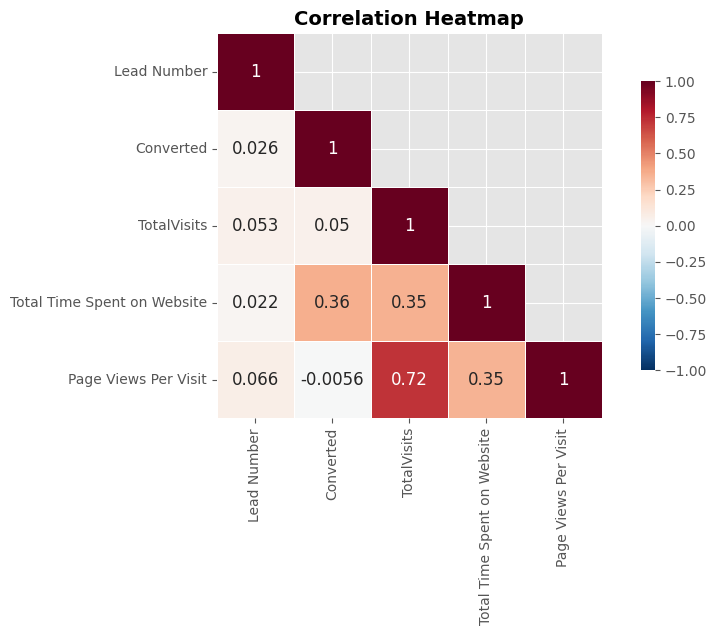

In [66]:
# To check the correlation among variables

Correl_mat = leads.corr()
mask = np.array(Correl_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)

heatmap= sns.heatmap(leads.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'RdBu_r',
                      cbar_kws = {'shrink': 0.75},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

heatmap.set_title(f"Correlation Heatmap", fontsize = 14, fontweight = 700)
plt.show(heatmap)

💡Key Observations:

Total visits and Page views per visit column are correlated.

In [67]:
# checking the shape of the dataset:
leads.shape

(9029, 11)

##Data Preparation:
###Creating Dummy Variables:

In [68]:
# dropping lead Number and Prospect ID as these columns are not relvant from modeling perspective:

leads.drop(['Lead Number','Prospect ID'], axis=1, inplace = True)
# creating a list of categorical features for dummy variable creation:

cat = leads.select_dtypes(include='object')
cat_cols = list(cat.columns)
print(cat_cols)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation']


In [69]:
# Creating dummy variables for categorical features:

dummy = pd.get_dummies(leads[cat_cols], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unkown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unkown,What is your current occupation_Working Professional
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [70]:
# dropping the original columns: 

leads = leads.drop(cat_cols, axis=1)
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0000,0,0.0000
1,0,5.0000,674,2.5000
2,1,2.0000,1532,2.0000
3,0,1.0000,305,1.0000
4,1,2.0000,1428,1.0000


In [71]:
# Combining dummy data with the original dataset

leads = pd.concat([leads, dummy], axis=1)
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unkown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unkown,What is your current occupation_Working Professional
0,0,0.0000,0,0.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,5.0000,674,2.5000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,2.0000,1532,2.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1.0000,305,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0000,1428,1.0000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [72]:
# checking the shape:

leads.shape

(9029, 50)

💡Key Observations:

Post dummy variable creation the leads data set now has ~50 columns and 9,029 rows.

##Test-Train Split

In [73]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
# Putting response variable to y
y = leads['Converted']
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unkown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unkown,What is your current occupation_Working Professional
0,0.0000,0,0.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,5.0000,674,2.5000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2.0000,1532,2.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0000,305,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0000,1428,1.0000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [74]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
# printing the shape of the test and train data set
print(X_train.shape)
print(X_test.shape)

(6320, 49)
(2709, 49)


💡Key Observations:

The no. of rows in X_train and X_test add up to leads dataset and the split ratio is ~70% , meaning test train split was successful.

##Feature Scaling using StandardScaler:

In [76]:
#create object of StandardScaler

scaler = StandardScaler()

#applying scaler() to numerical columns
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unkown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unkown,What is your current occupation_Working Professional
5493,-0.3943,-0.7082,-0.1352,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8064,-0.0397,-0.7118,0.4105,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4716,-0.0397,-0.4714,0.4105,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9117,-1.1034,-0.8843,-1.2266,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2402,1.0240,0.7048,-0.1352,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


##Model Building:
###Feature Selection Using RFE:

In [77]:
# Shortlisting 15 features using RFE approach:

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True])

In [78]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 22),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreac

In [79]:
#list of 15 features shortlisted by RFE:

col = X_train.columns[rfe.support_]
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Unkown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unkown',
       'What is your current occupation_Working Professional'],
      dtype='object')


###Model 1:

In [80]:
# building model 1 using features shortlisted by RFE stored in the variable 'col' in the step above

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.5
Date:                Fri, 19 May 2023   Deviance:                       5132.9
Time:                        16:45:17   Pearson chi2:                 7.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6518      0.147     -4.423      0.000      -0.941      -0.363
Total Time Spent on Website                              1.0872      0.040     26.891      0.000       1.008       1.166
Lead Origin_Landing Page Submission                     -1.0494      0.130     -8.069      0.000      -1.304      -0.794
Lead Origin_Lead Add Form                                2.7823      0.212     13.120      0.000       2.367       3.198
Lead Source_Olark Chat                                   1.2160      0.124      9.801      0.000       0.973       1.459
Lead Source_Welingak Website                             2.6118      0.750      3.484      0.000       1.143       4.081
Last Activity_Email Bounced                             -1.1552      0.310     -3.721      0.000      -1.764      -0.547
Last Activity_Email Opened                               0.6006      0.106      5.668      0.000       0.393       0.808
Last Activity_Olark Chat Conversation                   -0.8608      0.185     -4.641      0.000      -1.224      -0.497
Last Activity_Others                                     1.8777      0.456      4.114      0.000       0.983       2.772
Last Activity_SMS Sent                                   1.7495      0.109     16.024      0.000       1.536       1.963
Specialization_Hospitality Management                   -0.6124      0.315     -1.947      0.052      -1.229       0.004
Specialization_Unkown                                   -1.0062      0.125     -8.022      0.000      -1.252      -0.760
What is your current occupation_Housewife               22.9952   1.67e+04      0.001      0.999   -3.27e+04    3.27e+04
What is your current occupation_Unkown                  -1.1743      0.089    -13.243      0.000      -1.348      -1.000
What is your current occupation_Working Professional     2.2532      0.184     12.242      0.000       1.892       2.614
========================================================================================================================
"""

In [81]:
# creating a df to display features and their respective VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.8400
11,Specialization_Unkown,2.7900
6,Last Activity_Email Opened,2.5000
9,Last Activity_SMS Sent,2.2700
3,Lead Source_Olark Chat,2.2300
7,Last Activity_Olark Chat Conversation,1.8300
2,Lead Origin_Lead Add Form,1.6600
13,What is your current occupation_Unkown,1.6300
4,Lead Source_Welingak Website,1.3300
0,Total Time Spent on Website,1.2600


In [82]:
# dropping 'What is your current occupation_Housewife' feature:

col = col.drop('What is your current occupation_Housewife', 1)

###Model 2:

In [83]:
# building model 2 after dropping 'What is your current occupation_Housewife' feature:

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.5
Date:                Fri, 19 May 2023   Deviance:                       5143.0
Time:                        17:05:09   Pearson chi2:                 7.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4030
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6455      0.147     -4.385      0.000      -0.934      -0.357
Total Time Spent on Website                              1.0865      0.040     26.904      0.000       1.007       1.166
Lead Origin_Landing Page Submission                     -1.0465      0.130     -8.057      0.000      -1.301      -0.792
Lead Origin_Lead Add Form                                2.7848      0.212     13.140      0.000       2.369       3.200
Lead Source_Olark Chat                                   1.2148      0.124      9.794      0.000       0.972       1.458
Lead Source_Welingak Website                             2.6071      0.750      3.478      0.001       1.138       4.076
Last Activity_Email Bounced                             -1.1612      0.310     -3.741      0.000      -1.769      -0.553
Last Activity_Email Opened                               0.6004      0.106      5.678      0.000       0.393       0.808
Last Activity_Olark Chat Conversation                   -0.8638      0.185     -4.660      0.000      -1.227      -0.500
Last Activity_Others                                     1.8715      0.456      4.101      0.000       0.977       2.766
Last Activity_SMS Sent                                   1.7433      0.109     15.993      0.000       1.530       1.957
Specialization_Hospitality Management                   -0.6168      0.314     -1.962      0.050      -1.233      -0.001
Specialization_Unkown                                   -1.0086      0.125     -8.048      0.000      -1.254      -0.763
What is your current occupation_Unkown                  -1.1775      0.089    -13.286      0.000      -1.351      -1.004
What is your current occupation_Working Professional     2.2473      0.184     12.214      0.000       1.887       2.608
========================================================================================================================
"""

In [84]:
# creating a df to display features and their respective VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.8400
11,Specialization_Unkown,2.7900
6,Last Activity_Email Opened,2.5000
9,Last Activity_SMS Sent,2.2700
3,Lead Source_Olark Chat,2.2300
7,Last Activity_Olark Chat Conversation,1.8300
2,Lead Origin_Lead Add Form,1.6600
12,What is your current occupation_Unkown,1.6300
4,Lead Source_Welingak Website,1.3300
0,Total Time Spent on Website,1.2600


💡Key Observations:

p-value of 'Specialization_Hospitality Management' is at the threshold value of 0.05, hence dropping it.

VIF's for all features are within the prescribed limit of <5.0

In [85]:
# dropping 'Specialization_Hospitality Management' feature:

col = col.drop('Specialization_Hospitality Management', 1)

###Model 3:

In [86]:
# building model 3 after dropping 'Specialization_Hospitality Management':

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm3.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.4
Date:                Fri, 19 May 2023   Deviance:                       5146.9
Time:                        17:06:35   Pearson chi2:                 7.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6653      0.147     -4.530      0.000      -0.953      -0.377
Total Time Spent on Website                              1.0848      0.040     26.876      0.000       1.006       1.164
Lead Origin_Landing Page Submission                     -1.0365      0.130     -7.991      0.000      -1.291      -0.782
Lead Origin_Lead Add Form                                2.7723      0.211     13.110      0.000       2.358       3.187
Lead Source_Olark Chat                                   1.2144      0.124      9.794      0.000       0.971       1.457
Lead Source_Welingak Website                             2.6191      0.749      3.495      0.000       1.150       4.088
Last Activity_Email Bounced                             -1.1662      0.310     -3.766      0.000      -1.773      -0.559
Last Activity_Email Opened                               0.6025      0.106      5.698      0.000       0.395       0.810
Last Activity_Olark Chat Conversation                   -0.8615      0.185     -4.650      0.000      -1.225      -0.498
Last Activity_Others                                     1.8800      0.456      4.122      0.000       0.986       2.774
Last Activity_SMS Sent                                   1.7434      0.109     15.998      0.000       1.530       1.957
Specialization_Unkown                                   -0.9897      0.125     -7.929      0.000      -1.234      -0.745
What is your current occupation_Unkown                  -1.1766      0.089    -13.277      0.000      -1.350      -1.003
What is your current occupation_Working Professional     2.2327      0.183     12.176      0.000       1.873       2.592
========================================================================================================================
"""

In [87]:
# creating a df to display features and their respective VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.8400
10,Specialization_Unkown,2.7900
6,Last Activity_Email Opened,2.5000
9,Last Activity_SMS Sent,2.2700
3,Lead Source_Olark Chat,2.2300
7,Last Activity_Olark Chat Conversation,1.8300
2,Lead Origin_Lead Add Form,1.6600
11,What is your current occupation_Unkown,1.6300
4,Lead Source_Welingak Website,1.3300
0,Total Time Spent on Website,1.2600


💡Key Observations:

The p value of all features are under the threshold value 0.05.

VIF's for all features are within the prescribed limit of less than 5.0

The model currently has ~13 features, of these 3 of the features (Specialization_Unkown, 'What is your current occupation_Unkown', "Last Activity_Others" are ones created by us as part of missing values treatment or data clean-up.

Dropping 'What is your current occupation_Unkown' as it seems the least informative from business sense.

In [88]:
# dropping 'What is your current occupation_Unkown' feature:

col = col.drop('What is your current occupation_Unkown', 1)

###Model 4:

In [89]:
# building model 4 after dropping 'What is your current occupation_Unkown':

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm4.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.5
Date:                Fri, 19 May 2023   Deviance:                       5341.0
Time:                        17:08:21   Pearson chi2:                 8.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3840
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8174      0.145     -5.626      0.000      -1.102      -0.533
Total Time Spent on Website                              1.0842      0.040     27.362      0.000       1.007       1.162
Lead Origin_Landing Page Submission                     -1.1630      0.129     -9.045      0.000      -1.415      -0.911
Lead Origin_Lead Add Form                                3.0262      0.211     14.330      0.000       2.612       3.440
Lead Source_Olark Chat                                   1.1221      0.121      9.265      0.000       0.885       1.360
Lead Source_Welingak Website                             2.7317      0.750      3.642      0.000       1.261       4.202
Last Activity_Email Bounced                             -1.1419      0.306     -3.738      0.000      -1.741      -0.543
Last Activity_Email Opened                               0.6278      0.104      6.029      0.000       0.424       0.832
Last Activity_Olark Chat Conversation                   -0.9301      0.183     -5.092      0.000      -1.288      -0.572
Last Activity_Others                                     2.0230      0.451      4.482      0.000       1.138       2.908
Last Activity_SMS Sent                                   1.7672      0.107     16.460      0.000       1.557       1.978
Specialization_Unkown                                   -1.2312      0.123     -9.978      0.000      -1.473      -0.989
What is your current occupation_Working Professional     2.4880      0.184     13.509      0.000       2.127       2.849
========================================================================================================================
"""

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.6500
10,Specialization_Unkown,2.5800
6,Last Activity_Email Opened,2.4900
9,Last Activity_SMS Sent,2.2700
3,Lead Source_Olark Chat,2.2100
7,Last Activity_Olark Chat Conversation,1.8100
2,Lead Origin_Lead Add Form,1.6600
4,Lead Source_Welingak Website,1.3200
0,Total Time Spent on Website,1.2500
11,What is your current occupation_Working Profes...,1.2000


💡Key Observations:

Dropping 'Last Activity_Others' as this is a field we created by clubbing categories with low frequencies.

In [91]:
# dropping 'What is your current occupation_Unkown' feature:

col = col.drop('Last Activity_Others', 1)

###Model 5:

In [92]:
# building model 5 after dropping 'Last Activity_Others':

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm5.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.0
Date:                Fri, 19 May 2023   Deviance:                       5362.0
Time:                        17:09:46   Pearson chi2:                 7.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7363      0.143     -5.135      0.000      -1.017      -0.455
Total Time Spent on Website                              1.0839      0.040     27.436      0.000       1.007       1.161
Lead Origin_Landing Page Submission                     -1.1652      0.128     -9.078      0.000      -1.417      -0.914
Lead Origin_Lead Add Form                                3.0466      0.210     14.485      0.000       2.634       3.459
Lead Source_Olark Chat                                   1.1154      0.121      9.229      0.000       0.879       1.352
Lead Source_Welingak Website                             2.7002      0.750      3.601      0.000       1.230       4.170
Last Activity_Email Bounced                             -1.2250      0.305     -4.018      0.000      -1.823      -0.627
Last Activity_Email Opened                               0.5463      0.101      5.386      0.000       0.348       0.745
Last Activity_Olark Chat Conversation                   -1.0114      0.181     -5.582      0.000      -1.366      -0.656
Last Activity_SMS Sent                                   1.6858      0.105     16.106      0.000       1.481       1.891
Specialization_Unkown                                   -1.2251      0.123     -9.945      0.000      -1.467      -0.984
What is your current occupation_Working Professional     2.4946      0.185     13.501      0.000       2.132       2.857
========================================================================================================================
"""

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.6100
9,Specialization_Unkown,2.5600
6,Last Activity_Email Opened,2.4600
8,Last Activity_SMS Sent,2.2400
3,Lead Source_Olark Chat,2.2100
7,Last Activity_Olark Chat Conversation,1.8000
2,Lead Origin_Lead Add Form,1.6400
4,Lead Source_Welingak Website,1.3200
0,Total Time Spent on Website,1.2500
10,What is your current occupation_Working Profes...,1.2000


💡Key Observations:

Dropping 'Specialization_Unkown' as this is also a category we created while handling null values.

In [94]:
col = col.drop('Specialization_Unkown', 1)

###Final Model:

In [95]:
# building model 6 after dropping 'Last Activity_Others':

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm6.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.6
Date:                Fri, 19 May 2023   Deviance:                       5465.2
Time:                        17:11:03   Pearson chi2:                 7.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3718
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6797      0.108    -15.534      0.000      -1.892      -1.468
Total Time Spent on Website                              1.1109      0.039     28.340      0.000       1.034       1.188
Lead Origin_Landing Page Submission                     -0.2492      0.087     -2.864      0.004      -0.420      -0.079
Lead Origin_Lead Add Form                                3.4188      0.207     16.545      0.000       3.014       3.824
Lead Source_Olark Chat                                   1.0748      0.117      9.188      0.000       0.846       1.304
Lead Source_Welingak Website                             2.1655      0.748      2.897      0.004       0.700       3.631
Last Activity_Email Bounced                             -1.3296      0.306     -4.342      0.000      -1.930      -0.729
Last Activity_Email Opened                               0.5474      0.100      5.467      0.000       0.351       0.744
Last Activity_Olark Chat Conversation                   -1.0816      0.177     -6.127      0.000      -1.428      -0.736
Last Activity_SMS Sent                                   1.6544      0.103     15.990      0.000       1.452       1.857
What is your current occupation_Working Professional     2.6585      0.179     14.819      0.000       2.307       3.010
========================================================================================================================
"""

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.2600
3,Lead Source_Olark Chat,2.0200
6,Last Activity_Email Opened,1.9400
8,Last Activity_SMS Sent,1.8300
2,Lead Origin_Lead Add Form,1.6400
7,Last Activity_Olark Chat Conversation,1.5300
4,Lead Source_Welingak Website,1.2900
0,Total Time Spent on Website,1.2500
9,What is your current occupation_Working Profes...,1.1800
5,Last Activity_Email Bounced,1.1100


💡Key Observations:

The model now has 10 features, with both p-values and VIF scores within their respective thresholds.

Considering Model 6 as our final model.

###Predicting values for the train set:

In [97]:
# Getting the Predicted values on the train set

y_train_pred = model.predict(X_train_sm)
y_train_pred[:10]

5493   0.1027
8064   0.0780
4716   0.3104
9117   0.2612
2402   0.3547
1796   0.0648
1120   0.0648
253    0.1120
1491   0.1581
2004   0.2642
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10265267, 0.07795562, 0.31042335, 0.26117956, 0.35469053,
       0.0648352 , 0.0648352 , 0.11202255, 0.15805812, 0.26416948])

In [99]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect
0,0,0.1027,5493
1,0,0.0780,8064
2,0,0.3104,4716
3,0,0.2612,9117
4,1,0.3547,2402


In [100]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final["Convert_Prob"].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Prospect,Predicted
0,0,0.1027,5493,0
1,0,0.0780,8064,0
2,0,0.3104,4716,0
3,0,0.2612,9117,0
4,1,0.3547,2402,0


##Model Evaluation:
###Confusion Matrix:

**Interpretation of the Confusion Matrix and The Various Evaluation Matrices From our Model Prespective:**

**Interpretation of Confustion Matrix:**

True Positive (TP): Model predicted that the lead converted and it actually did.

True Negative (TN): Model predicted that the lead did not convert and it actually did not.

False Positive (FP): Model predicted that the lead converted, however it actually did not.

False Negative (FN): Model predicted that the lead did not convert, however it actually converted.

Interpretation of the Various Model Evaluation Matrices:

Accuracy: Measures overall accuracy of the model classification.

Precision: Measure accuracy of a class, Model predicts lead "Converted" how often it is correct.

Sensitivity or Recall: Measures true positive rate. When it is actually "Converted" how often does the model predict "Converted".

Specificity: Measures true negative rate. When it is actually "Not Converted", how often does the model predictit is "Not Converted".

💡Key Observations:

Given our problem statement, the evaluation matrices to focus on are Sensitivity and Specificity and Precision.

Given the inverse relation between Sensitivity and Precision, getting the optimal probability cut-off will be key.

In [101]:
# creating the confusion matrix for model evaluation stats:
conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

# defining a function to pull model evaluation stats:
def evaluation_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)

    print ("Model Accuracy                       : ", round(accuracy*100,1),"%")
    print ("Model Sensitivity                    : ", round(sensitivity*100,1),"%")
    print ("Model Specificity                    : ", round(specificity*100,1),"%")
    print ("Model Precision                      : ", round(precision*100,1),"%")

In [102]:
# plotting the confusion matrix: 

def conf_matrix_plot(cm):
    plt.figure(figsize=(5,4))
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted Values',size=12)
    ax.set_ylabel('Actual Values',size=12)
    ax.set_title('Confusion Matrix', size=14,fontweight = 600)
    return plt.show()

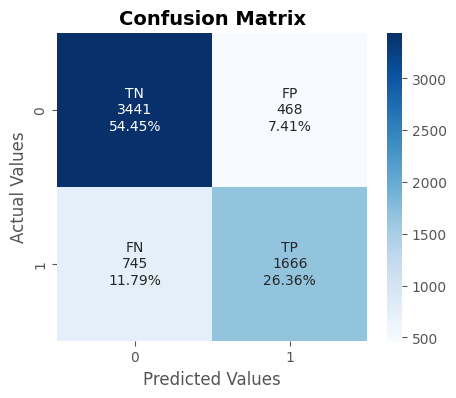

In [103]:
# Creating a confusion matrix using the defined function: 

conf_matrix_plot(conf_matrix)

###Evaluating the model with a cut-off of 0.50:

In [104]:
# evaluating the model using custom function defined above:

evaluation_metrics (conf_matrix)

Model Accuracy                       :  80.8 %
Model Sensitivity                    :  69.1 %
Model Specificity                    :  88.0 %
Model Precision                      :  78.1 %


💡Key Observations:

At 50% cutt-off, the model Accuracy, Specificity and Precision are >= 80%.

However the sentivity of the model is very poor at 65.9%, hence we need to figure out the optimal cut-off point.

###Finding Optimal Cut-off Point:

In [105]:
# creating columns with different probability cutoffs: 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Convert_Prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.1027,5493,0,1,1,0,0,0,0,0,0,0,0
1,0,0.0780,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.3104,4716,0,1,1,1,1,0,0,0,0,0,0
3,0,0.2612,9117,0,1,1,1,0,0,0,0,0,0,0
4,1,0.3547,2402,0,1,1,1,1,0,0,0,0,0,0


In [106]:
# calculating accuracy sensitivity and specificity for various probability cutoffs:

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity','precision','recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, precision[1], recall[1]]
cutoff_df

,probability,accuracy,sensitivity,specificity,precision,recall
0.0000,0.0000,0.3815,1.0000,0.0000,1.0000,0.0000
0.1000,0.1000,0.5897,0.9676,0.3566,0.4812,0.9676
0.2000,0.2000,0.7248,0.9175,0.6060,0.5896,0.9175
0.3000,0.3000,0.7913,0.8237,0.7713,0.6896,0.8237
0.4000,0.4000,0.8071,0.7511,0.8416,0.7453,0.7511
0.5000,0.5000,0.8081,0.6910,0.8803,0.7807,0.6910
0.6000,0.6000,0.7881,0.5724,0.9212,0.8175,0.5724
0.7000,0.7000,0.7709,0.4873,0.9458,0.8472,0.4873
0.8000,0.8000,0.7432,0.3733,0.9713,0.8893,0.3733
0.9000,0.9000,0.7078,0.2530,0.9882,0.9299,0.2530


<Figure size 1000x1000 with 0 Axes>

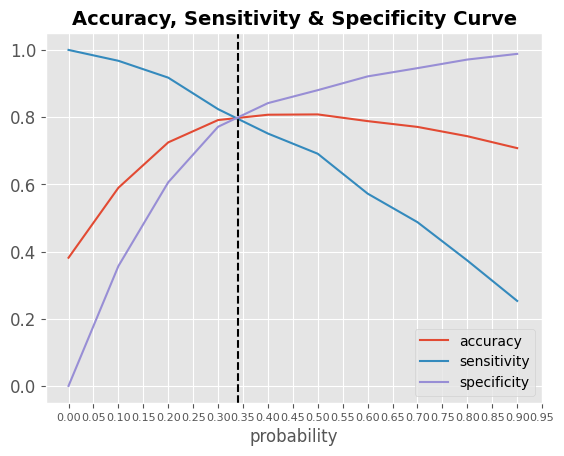

In [107]:
# plotting the 'accuracy','sensitivity','specificity' chart: 

plt.figure(figsize=(10,10))
ax= cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
ax.axvline(x=0.34, color='black', linestyle='--')
ax.set_title('Accuracy, Sensitivity & Specificity Curve', size=14,fontweight = 600)
plt.yticks(size=12)
plt.show()

💡Key Observations:

From the above curve we can see that the optimal cutoff is at 0.34. This is the point where all the parameters - Accuracy,Sensitivity,Specificity are equally balanced.

In [108]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.35 else 0

y_train_pred_final['Predicted'] = y_train_pred_final['Convert_Prob'].map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect,Predicted
0,0,0.1027,5493,0
1,0,0.0780,8064,0
2,0,0.3104,4716,0
3,0,0.2612,9117,0
4,1,0.3547,2402,1


###Confusion Matrix for Train Data:

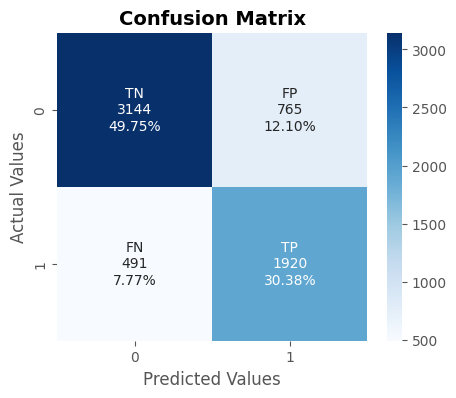

In [109]:
# plotting the confusion matrix:
conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
conf_matrix_plot(conf_matrix)

###Evaluating the model on train data with the cut-off point of 0.34:

In [110]:
# evaluating the model using custom function defined above:

evaluation_metrics (conf_matrix)

Model Accuracy                       :  80.1 %
Model Sensitivity                    :  79.6 %
Model Specificity                    :  80.4 %
Model Precision                      :  71.5 %


💡Key Observations:

When we select the optimal cutoff = 0.34, the various performance parameters Accuracy, Sensitivity & Specificity are all ~80%.

As per our business objective, the recall/sensitivity percentage is more significant since we don't want to miss out on any hot leads who are willing to get converted and a recall/sensitivity value of ~80% suggest a good model.

Precision for our model is ~72%.

In [111]:
# Classification Record : Precision, Recall and F1 Score:

print( metrics.classification_report( y_train_pred_final['Converted'], y_train_pred_final['Predicted'] ) )

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3909
           1       0.72      0.80      0.75      2411

    accuracy                           0.80      6320
   macro avg       0.79      0.80      0.79      6320
weighted avg       0.81      0.80      0.80      6320



💡Key Observations:

Clearly our model has better precision in indentifying customers who are not likely to convert as compared to those who will convert.

###Plotting the ROC Curve:
#####ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

In [112]:
# defining the function to plot the ROC curve:

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve',size=14, fontweight = 600)
    plt.legend(loc="lower right")
    plt.show()

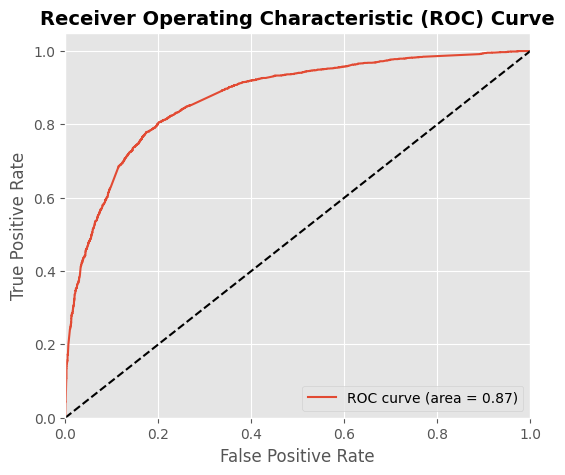

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], 
                                         y_train_pred_final["Convert_Prob"], 
                                         drop_intermediate = False )
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Convert_Prob"])

💡Key Observations:

The ROC Curve should be a value close to 1. We are getting a value of 0.87 indicating a good predictive model.

###Precision/Recall Tradeoff:

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Convert_Prob'])

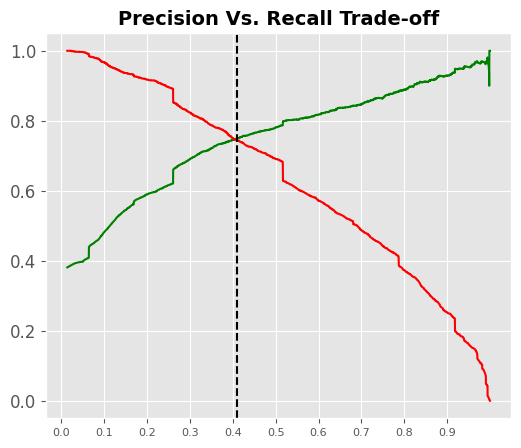

In [115]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(6,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.41, color='black', linestyle='--') # additing axline
plt.title('Precision Vs. Recall Trade-off', size=14, fontweight = 600)
plt.xticks(np.arange(0,1,step=0.1),size=8)
plt.yticks(size=12)

plt.show()


💡Key Observations:

As seen from above, there is tradeoff between Precision and Recall.

Precision and Recall are inversely related means if one increases other will genuinely decrease.

Based on Precision- Recall Trade off curve, the cutoff point seems to 0.41.

In [116]:
#Creating new column 'Predicted_PRT' with value 1 if Lead_Score_Prob > 0.41 else 0

y_train_pred_final['Predicted_PRT'] = y_train_pred_final['Convert_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect,Predicted,Predicted_PRT
0,0,0.1027,5493,0,0
1,0,0.0780,8064,0,0
2,0,0.3104,4716,0,0
3,0,0.2612,9117,0,0
4,1,0.3547,2402,1,0


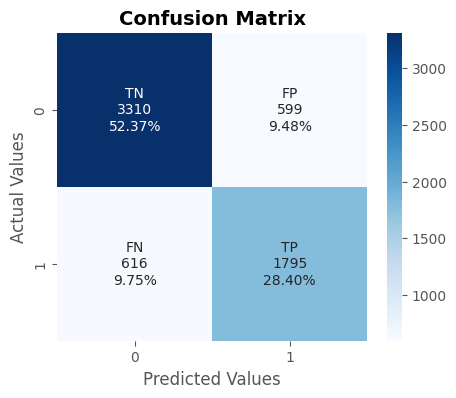

In [117]:
conf_matrix_PRT = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted_PRT'])
conf_matrix_plot(conf_matrix_PRT)

####Evaluating the model with the cut-off point received from the Precision/Recall curve:

In [118]:
#Data based on cutoff received from Precision-Recall Trade off

evaluation_metrics (conf_matrix_PRT)

Model Accuracy                       :  80.8 %
Model Sensitivity                    :  74.5 %
Model Specificity                    :  84.7 %
Model Precision                      :  75.0 %


In [119]:
print(metrics.classification_report( y_train_pred_final['Converted'], y_train_pred_final['Predicted_PRT'] ) )

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3909
           1       0.75      0.74      0.75      2411

    accuracy                           0.81      6320
   macro avg       0.80      0.80      0.80      6320
weighted avg       0.81      0.81      0.81      6320



💡Key Observations:

As seen from above, both sensitivity and precision have gone down to ~75%.

Since the business requires us to have sensitivity of >= 80% we will not be using this cut-off.

###Making predictions on the test set:

In [120]:
# Scaling the test dataset :

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unkown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unkown,What is your current occupation_Working Professional
4664,-1.1034,-0.8843,-1.2266,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5394,0.3148,-0.5834,-0.5008,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1595,0.3148,1.2645,0.9561,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2111,1.3786,0.0736,2.5932,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9182,-1.1034,-0.8843,-1.2266,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [123]:
# filtering the X_test to reflect features from our final model:

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional
4664,-0.8843,0,0,1,0,0,1,0,0,0
5394,-0.5834,0,0,1,0,0,1,0,0,0
1595,1.2645,1,0,0,0,0,1,0,0,1
2111,0.0736,1,0,0,0,0,1,0,0,0
9182,-0.8843,0,0,1,0,0,0,0,1,0


In [124]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [125]:
# Predicting the final test model 

y_test_pred = model.predict(X_test_sm)

In [126]:
y_test_pred[:10]

4664   0.2612
5394   0.3306
1595   0.9359
2111   0.2142
9182   0.5168
1055   0.7417
541    0.1348
446    0.9938
3728   0.0555
4249   0.0539
dtype: float64

In [127]:
# Converting y_pred to a dataframe which is an array

y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4664,0.2612
5394,0.3306
1595,0.9359
2111,0.2142
9182,0.5168


In [128]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4664,0
5394,0
1595,1
2111,0
9182,0


In [129]:
# Putting CustID to index

y_test_df['Prospect'] = y_test_df.index

# Removing index for both dataframes to append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect,0
0,0,4664,0.2612
1,0,5394,0.3306
2,1,1595,0.9359
3,0,2111,0.2142
4,0,9182,0.5168


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect','Converted','Convert_Prob'], axis=1)
y_pred_final.head()

,Prospect,Converted,Convert_Prob
0,4664,0,0.2612
1,5394,0,0.3306
2,1595,1,0.9359
3,2111,0,0.2142
4,9182,0,0.5168


In [131]:
#Creating new column 'Final_Predicted' with value 1 if Lead_Score_Prob > 0.35 else 0

y_pred_final['Final_Predicted'] = y_pred_final["Convert_Prob"].map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect,Converted,Convert_Prob,Final_Predicted
0,4664,0,0.2612,0
1,5394,0,0.3306,0
2,1595,1,0.9359,1
3,2111,0,0.2142,0
4,9182,0,0.5168,1


###Confustion Matrix for Test Data:

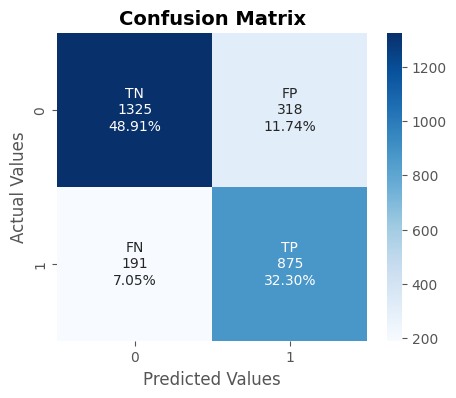

In [132]:
conf_matrix_final = confusion_matrix(y_pred_final['Converted'], y_pred_final['Final_Predicted'])
conf_matrix_plot(conf_matrix_final)

###Evaluating the Final model on Test data with the cut-off of 0.34:

In [133]:
evaluation_metrics (conf_matrix_final)

Model Accuracy                       :  81.2 %
Model Sensitivity                    :  82.1 %
Model Specificity                    :  80.6 %
Model Precision                      :  73.3 %


💡Key Observations:

We got ~2% difference on train and test data's performance metrics, implying that our final model didn't overfit training data and is performing well.

High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted.

Where as high Specificity will ensure that leads with border line probability of getting converted/not converted are not selected.

Depending on the business requirement, we can increase or decrease the probability threshold value which in turn will decrease or increase the Sensitivity/Specificity of the model.

###Plotting the ROC Curve:

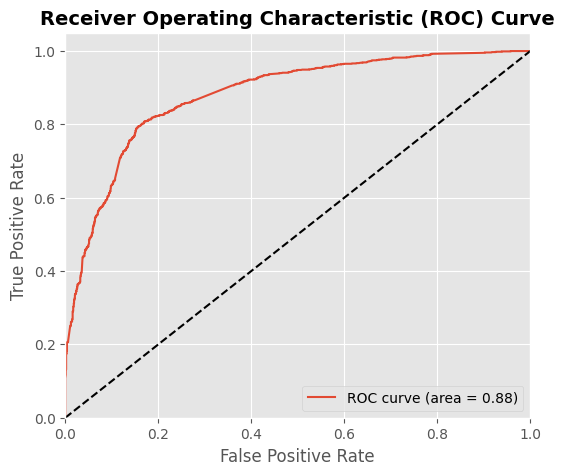

In [134]:
# plotting the ROC curve for test data:

draw_roc( y_pred_final['Converted'], y_pred_final['Convert_Prob'])

💡Key Observations:

AUC is 0.88, indicating a good predictive model.

In [135]:
# Classification summary: Precision, Recall and F1 Score:

print( metrics.classification_report( y_pred_final['Converted'], y_pred_final['Final_Predicted'] ) )

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1643
           1       0.73      0.82      0.77      1066

    accuracy                           0.81      2709
   macro avg       0.80      0.81      0.81      2709
weighted avg       0.82      0.81      0.81      2709



###Assigning Lead_score for the leads in Test Data Set:

In [136]:
# assigning a lead_score for the leads in Test Data Set:

y_pred_final['Lead_Score']=(y_pred_final['Convert_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Convert_Prob',ascending=False)

y_pred_final.head()


,Prospect,Converted,Convert_Prob,Final_Predicted,Lead_Score
0,4664,0,0.2612,0,26
1,5394,0,0.3306,0,33
2,1595,1,0.9359,1,93
3,2111,0,0.2142,0,21
4,9182,0,0.5168,1,51


###Final model features and coefficients

In [137]:
# looking at the final model features and coefficients:

pd.options.display.float_format = '{:.2f}'.format
final_parameters = model.params[1:]
final_parameters

Total Time Spent on Website                             1.11
Lead Origin_Landing Page Submission                    -0.25
Lead Origin_Lead Add Form                               3.42
Lead Source_Olark Chat                                  1.07
Lead Source_Welingak Website                            2.17
Last Activity_Email Bounced                            -1.33
Last Activity_Email Opened                              0.55
Last Activity_Olark Chat Conversation                  -1.08
Last Activity_SMS Sent                                  1.65
What is your current occupation_Working Professional    2.66
dtype: float64

In [138]:
# assigning relative weights to the features: 

feature_imp = final_parameters
feature_imp = 100.0 * (feature_imp / feature_imp.max())
feature_imp

Total Time Spent on Website                             32.49
Lead Origin_Landing Page Submission                     -7.29
Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                  31.44
Lead Source_Welingak Website                            63.34
Last Activity_Email Bounced                            -38.89
Last Activity_Email Opened                              16.01
Last Activity_Olark Chat Conversation                  -31.64
Last Activity_SMS Sent                                  48.39
What is your current occupation_Working Professional    77.76
dtype: float64

<Figure size 1200x800 with 0 Axes>

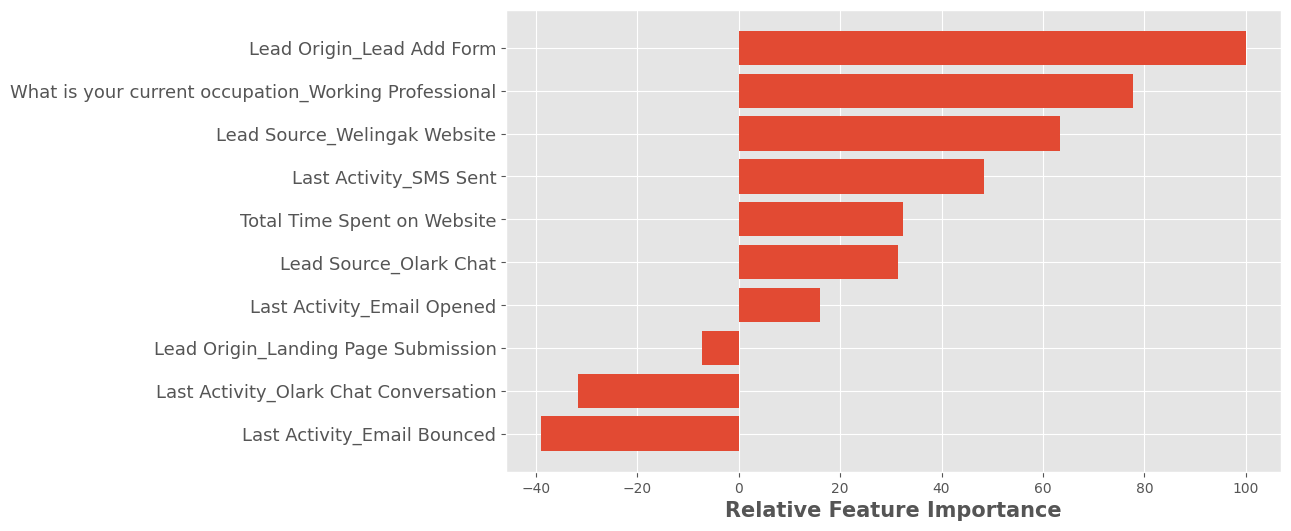

In [139]:
# plotting the features based on their relative importance:

feature_imp_sort = np.argsort(feature_imp,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(feature_imp_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, feature_imp[feature_imp_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[feature_imp_sort], fontsize=13)
ax.set_xlabel('Relative Feature Importance', fontsize=15, fontweight = 600)
plt.show()

###Conclusions:

#####It was found that the variables that mattered the most in identifying potential customers are:

**Lead Origin:**

a. Lead Add Form

b. Landing form Submission

**Current occupation:**

a. Working Professional

**Lead source:**

a. Welingak website

b. Olark Chat

**The total time spend on the Website**

Last activity:

a. SMS sent

b. Email Opened

c. Email Bounced